# Characterizing the vertical structure of oxygen in the ocean

Argovis provides an API that indexes and distributes numerous oceanographic datasets with detailed query parameters, enabling you to search and download only and exactly data of interest. 

This notebook guides users in exploring the vertical structure of oxygen in the ocean using ocean observations and gridded products (i.e. products that provide maps of oxygen in the ocean at different depths, starting from sparse point measurements). Please note that while the focus in the following is on oxygen, the same notebook can be used to visualize other fields (see possible input parameters for e.g. salinity included in commented lines in between lines starting with #+++).

## Learning goals

- Generate an average vertical profile of oxygen for a region in the North Atlantic and for a region in the North Pacific Ocean using Argo oxygen data.  
- Describe the features of the two profiles, noting similarities and differences.  
- Discuss the reasons for the differences between the two. 

## Setup: Register an API key

In order to allocate Argovis's limited computing resources fairly, users are encouraged to register and request a free API key. This works like a password that identifies your requests to Argovis. To do so:

 - Visit [https://argovis-keygen.colorado.edu/](https://argovis-keygen.colorado.edu/)
 - Fill out the form under _New Account Registration_
 - An API key will be emailed to you shortly.
 
Treat this API key like a password - don't share it or leave it anywhere public. If you ever forget it or accidentally reveal it to a third party, see the same website above to change or deactivate your token.

Put your API key in the quotes in the variable below before moving on (please note that if you proceed without including anything in the quotes, the notebook may still work, yet it may also give an error):

In [1]:
API_KEY=''

## Setup: import libraries and functions

In [2]:
# Let's start importing libraries and functions we will need
from argovisHelpers import helpers as avh

import matplotlib.colors as mcolors

import gsw

import matplotlib.pyplot as plt

# let's import functions from the .py file in the current folder
from Argovis_tasks_helpers import get_route,list_values_for_parameter_to_api_query,show_variable_names_for_collections, get_api_output_formatted_list_1var_for_regions_and_timeranges, get_api_output_formatted_list_1var_for_parameter, api_output_formatted_list_1var_plot_lons_lats_map,api_output_formatted_list_1var_plot_profiles,api_output_formatted_list_1var_plot_map,api_output_formatted_list_1var_plot_horizontal_and_time_ave

/Users/dgiglio/opt/miniconda3/envs/argovis_demos/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


## Setup: define parameters to query data of interest

Let's start with listing available data collections in Argovis. Please find more information about each product at https://argovis.colorado.edu/about.

In [3]:
# API call showing collections available for each route, along with a short description

#### to complete


Let's indicate the collections of interest, i.e. what datasets in Argovis you would like to use as they include the oceanic property of interest. We will also list the oceanic properties available in each collection (so that we can use the variable name of interest in the next code cell below). **Please first run the code with the current settings to familiarize yourself with the notebook: after that, if needed, then change the settings and run the notebook again.**

In [4]:
#### in the following we set parameters to compare ocean profiles with a gridded product
selection_params = {}
#+++ example to use Argo profile data and the glodap gridded product (which provides time mean fields)
selection_params['collections']  = ['argo', 'grids/glodap']
#+++

#+++ example to use ship-based data and the glodap gridded product
# selection_params['collections']  = ['cchdo', 'grids/glodap']
#+++

#+++ example to use Argo profile data and the Roemmich and Gilson monthly gridded product
# selection_params['collections']  = ['argo', 'grids/rg09']
#+++

#### let's print to screen some info based on the selected collections (to be able to select further parameters in the next cell)
vars_lists = show_variable_names_for_collections(collections_list=selection_params['collections'],API_KEY=API_KEY,verbose=True)


>>>>> argo
https://argovis-api.colorado.edu/argo/vocabulary?parameter=data
['bbp470', 'bbp470_argoqc', 'bbp532', 'bbp532_argoqc', 'bbp700', 'bbp700_2', 'bbp700_2_argoqc', 'bbp700_argoqc', 'bisulfide', 'bisulfide_argoqc', 'cdom', 'cdom_argoqc', 'chla', 'chla_argoqc', 'chla_fluorescence', 'chla_fluorescence_argoqc', 'cndc', 'cndc_argoqc', 'cp660', 'cp660_argoqc', 'down_irradiance380', 'down_irradiance380_argoqc', 'down_irradiance412', 'down_irradiance412_argoqc', 'down_irradiance443', 'down_irradiance443_argoqc', 'down_irradiance490', 'down_irradiance490_argoqc', 'down_irradiance555', 'down_irradiance555_argoqc', 'down_irradiance665', 'down_irradiance665_argoqc', 'down_irradiance670', 'down_irradiance670_argoqc', 'downwelling_par', 'downwelling_par_argoqc', 'doxy', 'doxy2', 'doxy2_argoqc', 'doxy3', 'doxy3_argoqc', 'doxy_argoqc', 'nitrate', 'nitrate_argoqc', 'ph_in_situ_total', 'ph_in_situ_total_argoqc', 'pressure', 'pressure_argoqc', 'salinity', 'salinity_argoqc', 'salinity_sfile', 'sali

Now let's indicate the data of interest within the collections we selected above. As examples, for each collection, we need to specify the variable name and the quality control flag of interest (if a specific qc flag is of interest and if the flag is available for a collection).

In [5]:
#### params varying with the region

#+++ example to use oxygen from Argo profile data (with argo qc flag 1) and the glodap gridded product
selection_params['varnames']     = ['doxy', 'oxygen']
selection_params['varnames_qc']  = [',1', ''] # argoqc = 1 is best quality
selection_params['varname_title']     = 'Oxygen'
#+++

#+++ example to use oxygen from ship based profile data (with woce qc flag 2) and the glodap gridded product
# selection_params['varnames']     = ['doxy', 'oxygen']
# selection_params['varnames_qc']  = [',2', ''] # woceqc = 2 is best quality, it corresponds to 'no problem noted' (see https://dmoserv3.whoi.edu/data_docs/GEOTRACES/EPZT/WOCE_QualityFlags.pdf)
# selection_params['varname_title']     = 'Oxygen'
#+++

#+++ example to use salinity from Argo profile data (with argo qc flag 1) and the Roemmich and Gilson monthly gridded product
# selection_params['varnames']     = ['salinity', 'rg09_salinity']
# selection_params['varnames_qc']  = [',1', ''] # argoqc = 1 is best quality
# selection_params['varname_title']     = 'Salinity'
#+++

# if we wanted to only consider oxygen profiles where temperature and salinity are qc 1, we would have here: 'temperature,1,salinity,1' (these additional variables are also stored for the regions of interest)
# (these additional variables are also stored for the regions of interest and visualized)
### please note that the first comma should be included!
### please note that qc flags are not used for Easyocean
selection_params['data_extra']     = ['',''] 

# define name of the variable that includes levels for each collection
selection_params['varname_levels'] = ['pressure',''] # for the gridded product, the level info is in the metadata, i.e. there is no variable in 'data' (for argo, 'pressure' is within the 'data' instead)


#### Before we continue, let's check that variables selected are included in the corresponding collection selected (if not, we should change the selected variable name in selection_params['varnames'])

In [6]:
for i,ilist in enumerate(vars_lists):
    if selection_params['varnames'][i] not in ilist:
        print('>>>>> '+selection_params['collections'][i]+' does not include selected variable, i.e. '+selection_params['varnames'][i])
        print('Here is a list of the variables that are included:')
        print(ilist)
        change_name_of_selected_variable_before_continuing
    else:
        print('>>>>> '+selection_params['collections'][i]+' includes selected variable, i.e. '+selection_params['varnames'][i])

>>>>> argo includes selected variable, i.e. doxy
>>>>> grids/glodap includes selected variable, i.e. oxygen


Let's now set the regions of interest and the type and tag for each region. Please note that in some regions and time periods of interest, the data of interest may not be available.


In [7]:
#### params varying with the region

# in this example, we will use the 'box' selection type (i.e. we query the data within boxes),
# hence we indicate here the bottom/left and top/right vertices for each box of interest... 
# the other option is to search in a 'polygon' and indicate the polygon
# vertices in a list (first and last vertex should be the same)

#+++ example to use oxygen from Argo profile data (with argo qc flag 1) and the glodap gridded product or the Roemmich and Gilson gridded product
selection_params['regions']     = [
                        [[-145.5,45.5],[-135.5,50.5]],
                        [[-50,45],[-40,50]],
                        ]
#+++ 

#+++ example to use oxygen from ship based profile data (with woce qc flag 2) and the glodap gridded product
#### please note that shipped based profiles are sparser than Argo profiles, hence we need to select a box where we think there are data of interest in the period of interest

# selection_params['regions']     = [
#                         [[-55.5,35.5],[-45.5,40.5]],
#                         ]
#+++ 

selection_params['regions_type'] = ['box', 'box']

selection_params['regions_tag'] = ['Pacific', 'Atlantic']
####



Finally, let's set up the time periods of interest (there could be more than one, e.g. to compare different seasons or different years). We also define the vertical levels that we want to use to interpolate observed profiles and colors to use for the line plots.

In [8]:
# list of startDate and endDates of interest (note: these will not be used for glodap as glodap only provides a time mean)
selection_params['startDate']    = ['2021-01-01T00:00:00Z']
selection_params['endDate']      = ['2021-12-31T00:00:00Z']

#### other params
# levels for vertically integrated profiles
selection_params['interp_levels']= list(range(10,2001))[0::20]
# colors to use for the line plots
colors = list(mcolors.TABLEAU_COLORS.keys())

## Loading the data of interest using the Argovis API

In the next code cell, parameters selected above are used to query the data of interest and format them in a way that allows to easily visualize the data. Depending on how many regions/time periods were selected and the extent of each region/time period of interest, the next code cell may take some time to complete.

In [9]:
api_output_formatted_list = get_api_output_formatted_list_1var_for_regions_and_timeranges(selection_params=selection_params,API_KEY=API_KEY)

>>>>>>>>> argo doxy, Pacific 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/argo?data=doxy,1&box=[[-145.5,+45.5],+[-135.5,+50.5]]&startDate=2021-01-01T00:00:00.000000Z&endDate=2021-12-31T00:00:00.000000Z
>>>>>>>>> argo doxy, Atlantic 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/argo?data=doxy,1&box=[[-50,+45],+[-40,+50]]&startDate=2021-01-01T00:00:00.000000Z&endDate=2021-12-31T00:00:00.000000Z
>>>>>>>>> grids/glodap oxygen, Pacific 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/grids/glodap?data=oxygen&box=[[-145.5,+45.5],+[-135.5,+50.5]]&startDate=1000-01-01T00:00:00.000000Z&endDate=1000-01-02T00:00:00.000000Z
https://argovis-api.colorado.edu/grids/meta?id=glodapv2.2016b
>>>>>>>>> grids/glodap oxygen, Atlantic 2021-01-01 to 2021-12-31
https://argovis-api.colorado.edu/grids/glodap?data=oxygen&box=[[-50,+45],+[-40,+50]]&startDate=1000-01-01T00:00:00.000000Z&endDate=1000-01-02T00:00:00.000000Z
https://argovis-api.colorado.edu/grids/meta?id=glodapv2.2016

## Visualization: map of profile locations in each region and time period of interest

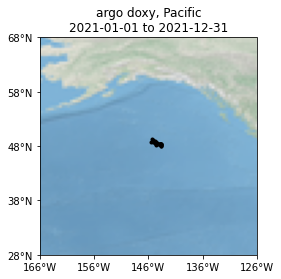

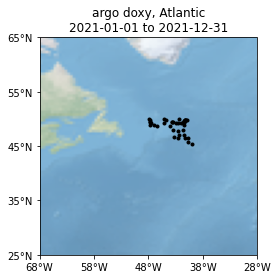

In [10]:
# plot map of lons and lats for data that are not gridded
api_output_formatted_list_1var_plot_lons_lats_map(api_output_formatted_list)      

## Visualization: plot profiles shown in the maps above

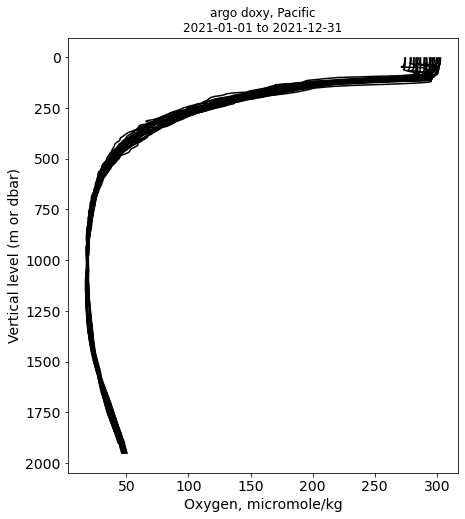

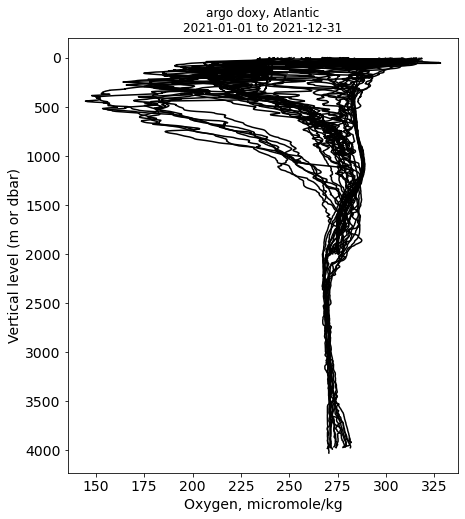

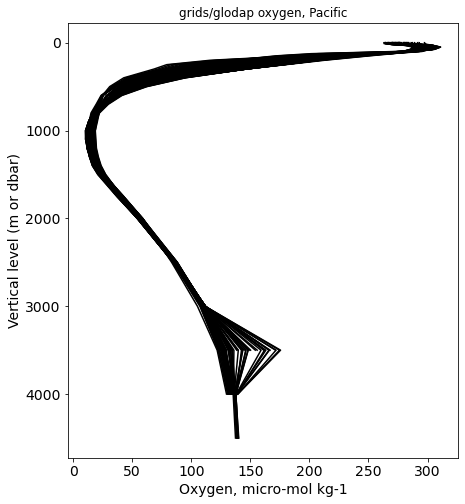

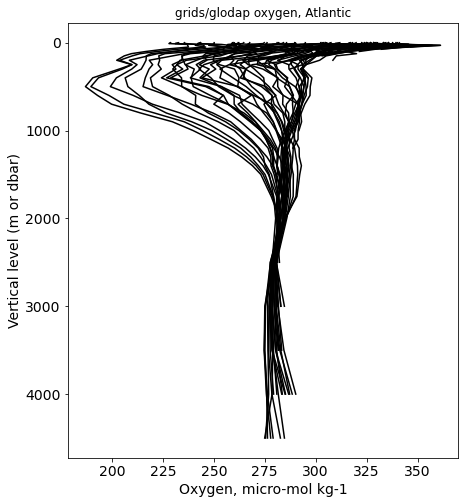

In [11]:
# plot the profiles shown above
api_output_formatted_list_1var_plot_profiles(api_output_formatted_list)

## Visualization: example map for gridded products (if available) in each region of interest

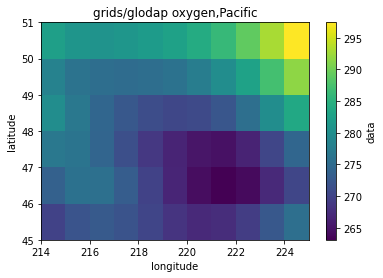

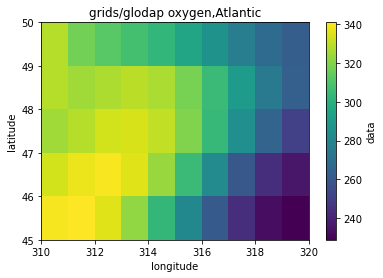

In [12]:
# plot map at one level and time
api_output_formatted_list_1var_plot_map(api_output_formatted_list,ilev=0,itime=0)  
               

## Visualization: for each product, plot the average vertical structure (i.e. horizontal and time average) in each region and time period of interest. 


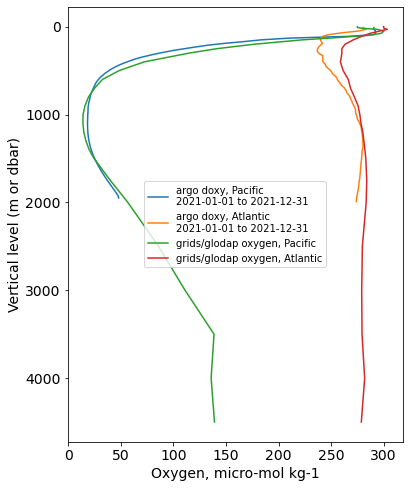

In [13]:
# plot horizontal and time average
api_output_formatted_list_1var_plot_horizontal_and_time_ave(api_output_formatted_list,colors)  


# Extra section: visualizing profiles from Argo platform and/or WOCE line

In the following, we will use some of the plots above to visualize profiles from a specific Argo platform and/or a WOCE line. In doing so, we will focus only on the object of interest (e.g. profiles from a specific Argo platform or WOCE line) and **NOT** select by region or time.

## Setup: define parameters to query data of interest

Let's indicate the collections of interest (i.e. what datasets in Argovis you would like to use as they include the oceanic property of interest) and the parameter of interest. The parameter of interest should be present in all the collections to consider (e.g. 'platform' is there for the Argo collection, yet 'woceline' is not there for Argo). We also list 1. all the variables that are available for each collection, and 2. all the values that are possible for the selected parameter (so that we can use the variable name and value of interest for the selected parameter, in following code cells). **Please first run the code with the current settings to familiarize yourself with the notebook: after that, if needed, then change the settings and run the notebook again.**

In [14]:
#+++

selection_params = {}

#+++ example for Argo platform
selection_params['collections']  = ['argo']
selection_params['parameter_name']= 'platform'
#+++

#+++ example for WOCE line from the Easyocean gridded product
selection_params['collections']  = ['easyocean']
selection_params['parameter_name']= 'woceline'
#+++ 

# let's print to screen some info based on the selected collections (to be able to select further parameters in the next cells)
show_variable_names_for_collections(collections_list=selection_params['collections'],API_KEY=API_KEY)

list_values_for_parameter_to_api_query(selection_params=selection_params,API_KEY=API_KEY)


>>>>> easyocean
https://argovis-api.colorado.edu/easyocean/vocabulary?parameter=data
https://argovis-api.colorado.edu/easyocean/vocabulary
Needs data parameter for vocabulary query
>>>>>>>>>>>>>>> easyocean <<<<<<<<<<<<<<<<<
['75N', 'A02', 'A03', 'A05', 'A10', 'A12', 'A13', 'A16-A23', 'A20', 'A22', 'A9.5', 'AR07E', 'AR07W', 'I01', 'I02', 'I03-I04', 'I05', 'I06S', 'I07', 'I08N', 'I08S-I09N', 'I09S', 'I10', 'IR06-I10', 'IR06E', 'IR06', 'P01', 'P02', 'P03', 'P04', 'P06', 'P09', 'P10', 'P11', 'P13', 'P14', 'P15', 'P16', 'P17E', 'P17', 'P18', 'P21', 'S04I', 'S04P', 'SR01', 'SR03', 'SR04']
>>>>> 75N occupations:
['1994-07-28T00:00:00.000Z', '1994-08-03T00:00:00.000Z']
['1995-10-09T00:00:00.000Z', '1995-10-22T00:00:00.000Z']
['1997-09-15T00:00:00.000Z', '1997-09-22T00:00:00.000Z']
['1998-09-20T00:00:00.000Z', '1998-09-27T00:00:00.000Z']
['1999-07-08T00:00:00.000Z', '1999-07-17T00:00:00.000Z']
['2000-07-06T00:00:00.000Z', '2000-07-13T00:00:00.000Z']
['2001-06-24T00:00:00.000Z', '2001-07-01T00:

['1989-02-09T00:00:00.000Z', '1989-05-10T00:00:00.000Z']
>>>>> P06 occupations:
['1992-05-04T00:00:00.000Z', '1992-07-27T00:00:00.000Z']
['2003-08-03T00:00:00.000Z', '2003-10-12T00:00:00.000Z']
['2009-11-22T00:00:00.000Z', '2010-02-09T00:00:00.000Z']
['2017-07-04T00:00:00.000Z', '2017-09-29T00:00:00.000Z']
>>>>> P09 occupations:
['1994-07-08T00:00:00.000Z', '1994-08-17T00:00:00.000Z']
['2010-07-07T00:00:00.000Z', '2010-08-10T00:00:00.000Z']
['2016-07-04T00:00:00.000Z', '2016-08-10T00:00:00.000Z']
['2022-08-05T00:00:00.000Z', '2022-10-16T00:00:00.000Z']
>>>>> P10 occupations:
['1993-10-12T00:00:00.000Z', '1993-11-03T00:00:00.000Z']
['2005-05-27T00:00:00.000Z', '2005-06-27T00:00:00.000Z']
['2012-01-14T00:00:00.000Z', '2012-02-05T00:00:00.000Z']
['2014-06-12T00:00:00.000Z', '2014-09-01T00:00:00.000Z']
>>>>> P11 occupations:
['1993-04-09T00:00:00.000Z', '1993-07-14T00:00:00.000Z']
>>>>> P13 occupations:
['1991-08-17T00:00:00.000Z', '1993-05-26T00:00:00.000Z']
['1992-08-24T00:00:00.000Z', '

Let's list the variables available for the collection of interest.

In [15]:
vars_lists = show_variable_names_for_collections(collections_list=selection_params['collections'],API_KEY=API_KEY,verbose=True)


>>>>> easyocean
https://argovis-api.colorado.edu/easyocean/vocabulary?parameter=data
['pressure', 'ctd_temperature', 'ctd_salinity', 'doxy', 'conservative_temperature', 'absolute_salinity']
https://argovis-api.colorado.edu/easyocean/vocabulary
Needs data parameter for vocabulary query


For each collection, indicate the parameter value of interest, the variable of interest, and, if needed, the 'section_start_date' of interest (this is needed e.g. for Easyocean). Please note that a variable may not be available for some parameter values (e.g. many Argo platforms do not measure bgc variables). The code in the following will return no profiles if the selected variable is not available for the parameter value of interest.

In [16]:
#### parameters to set for each collection based on the info printed above

#+++ argo example
selection_params['parameter']     = ['4903274']
#+++ 

#+++  easyocean example
selection_params['parameter']     = ['A10']
#+++

# based on the list above, let's set the section_start_date for the 'woceline' of interest
if selection_params['parameter_name']=='woceline':
    selection_params['section_start_date'] = ['2011-09-28T00:00:00.000Z']

# define name of variable of interest for each collection

#+++ argo example
selection_params['varnames']     = ['doxy']
selection_params['varnames_qc']  = [',1'] # argoqc = 1 is best quality
#+++

#+++ easyocean example
selection_params['varnames']     = ['doxy']
selection_params['varnames_qc']  = [''] # woceqc = 2 is best quality
#+++

selection_params['varname_title']     = 'Oxygen, umol/kg'

# if we wanted to only consider oxygen profiles where temperature and salinity are qc 1, we would have here: 'temperature,1,salinity,1' (these additional variables are also stored for the regions of interest)
# (these additional variables are also stored for the regions of interest and visualized)
### please note that the first comma should be included!
### please note that qc flags are not used for Easyocean

#+++ argo example
selection_params['data_extra']   = [',temperature,1,salinity,1']
#+++

#+++ easyocean example
selection_params['data_extra']   = [',ctd_temperature,ctd_salinity'] # we included these as we want to store them
#+++

# define name of the variable that includes levels for each collection
selection_params['varname_levels'] = ['pressure'] # 


Finally, let's define the vertical levels that we want to use to interpolate observed profiles and colors to use for the line plots. 

In [17]:
# levels for vertically integrated profiles
selection_params['interp_levels']= list(range(10,2001))[0::20]
# colors to use for the line plots
colors = list(mcolors.TABLEAU_COLORS.keys())

## Loading the data of interest using the Argovis API

In the next code cell, parameters selected above are used to query the data of interest and format them in a way that allows to easily visualize the data. Depending on the size of the data reuqested, the next code cell may take some time to complete.

In [18]:
api_output_formatted_list = get_api_output_formatted_list_1var_for_parameter(selection_params=selection_params,API_KEY=API_KEY)


QC flags are used only for Argo and CCHDO
doxy,ctd_temperature,ctd_salinity
https://argovis-api.colorado.edu/easyocean?data=doxy,ctd_temperature,ctd_salinity&woceline=A10&section_start_date=2011-09-28T00:00:00.000Z


In [19]:
api_output_formatted_list[0].keys()

dict_keys(['doxy', 'ctd_temperature', 'ctd_salinity'])

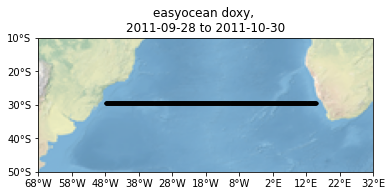

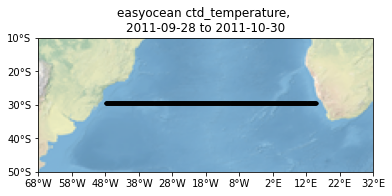

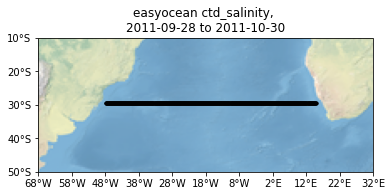

In [20]:
# plot map of lons and lats for data that are not gridded
api_output_formatted_list_1var_plot_lons_lats_map(api_output_formatted_list)      


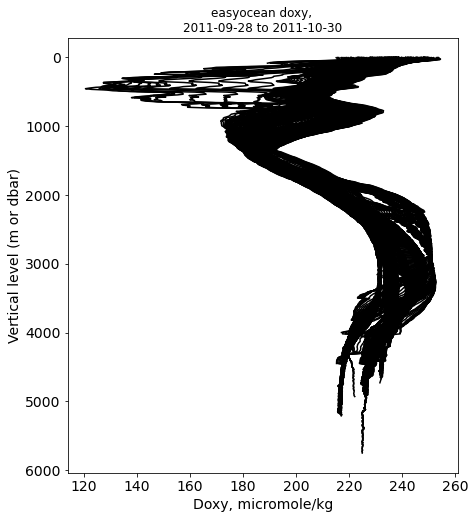

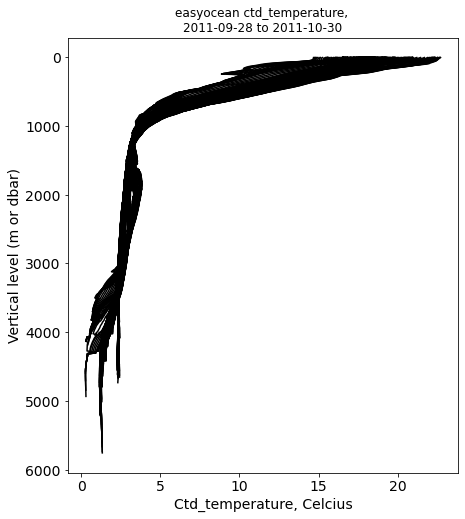

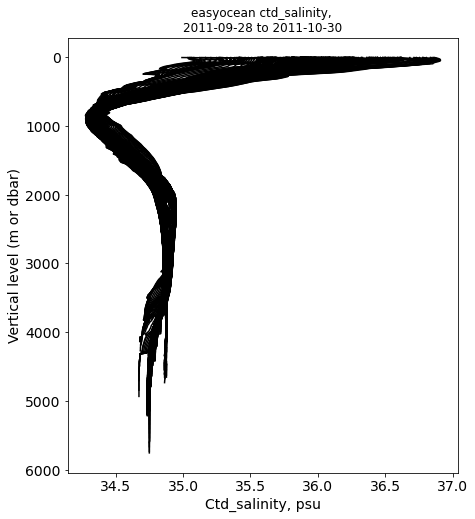

In [21]:
# plot the profiles shown above
api_output_formatted_list_1var_plot_profiles(api_output_formatted_list)

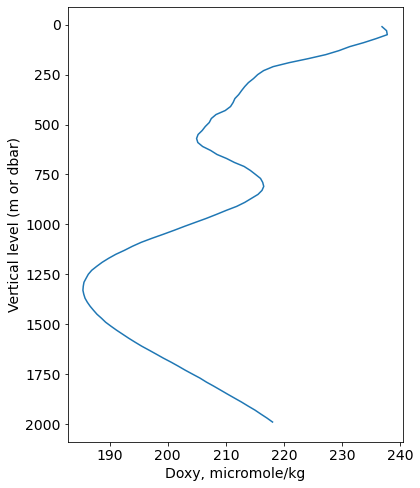

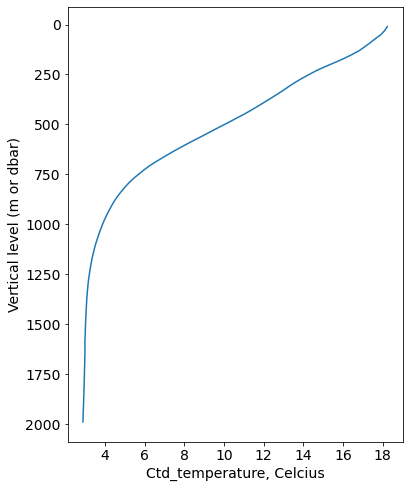

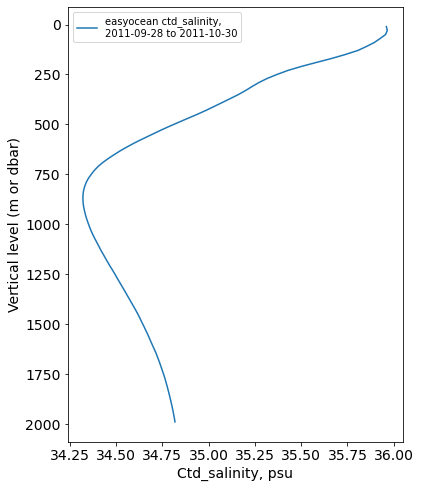

In [22]:
# plot horizontal and time average
api_output_formatted_list_1var_plot_horizontal_and_time_ave(api_output_formatted_list,colors)  


Let's compute potential density from in-situ temperature and salinity

In [23]:
for ilist,iapi_output in enumerate(api_output_formatted_list):
    # calculate potential density from 'data'
    bfr_data_temp = iapi_output['ctd_temperature']['data']
    bfr_data_salt = iapi_output['ctd_salinity']['data']
    bfr_data_levels =iapi_output['ctd_salinity']['levels']
    
    bfr_data_lon  = iapi_output['ctd_salinity']['longitude']
    bfr_data_lat  = iapi_output['ctd_salinity']['latitude']
    
    api_output_formatted_list[ilist]['potential_density']={}
    api_output_formatted_list[ilist]['potential_density']['data'] = []
    for i,idata in enumerate(bfr_data_salt):
        bfr_SA = gsw.conversions.SA_from_SP(SP=bfr_data_salt[i], p=bfr_data_levels[i], lon=bfr_data_lon[i], lat=bfr_data_lat[i])
        bfr_CT = gsw.conversions.CT_from_t(SA=bfr_SA, t=bfr_data_temp[i], p=bfr_data_levels[i])
        bfr_PD = gsw.density.sigma0(SA=bfr_SA, CT=bfr_CT)
        api_output_formatted_list[ilist]['potential_density']['data'].append(bfr_PD+1000)
    
    api_output_formatted_list[ilist]['potential_density']['varname']='potential_density'
    api_output_formatted_list[ilist]['potential_density']['varname_title']='Potential Density'
    api_output_formatted_list[ilist]['potential_density']['data_units']='kg/m^3'
    # include e.g. levels, long, lat for consistency with other variables
    api_output_formatted_list[ilist]['potential_density']['levels']=bfr_data_levels
    api_output_formatted_list[ilist]['potential_density']['longitude']=bfr_data_levels
    api_output_formatted_list[ilist]['potential_density']['latitude']=bfr_data_levels
        
    api_output_formatted_list[ilist]['potential_density']['collection']=iapi_output['ctd_salinity']['collection']
    api_output_formatted_list[ilist]['potential_density']['region_tag']=iapi_output['ctd_salinity']['region_tag']
    api_output_formatted_list[ilist]['potential_density']['startDate']=iapi_output['ctd_salinity']['startDate']
    api_output_formatted_list[ilist]['potential_density']['endDate']=iapi_output['ctd_salinity']['endDate']
    
    

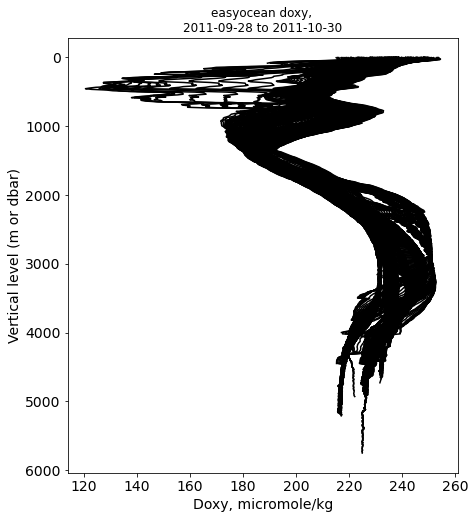

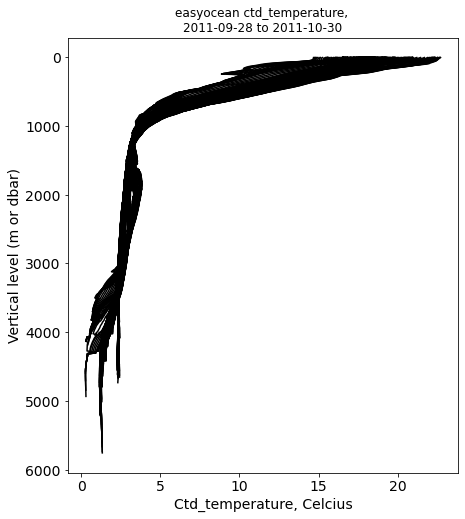

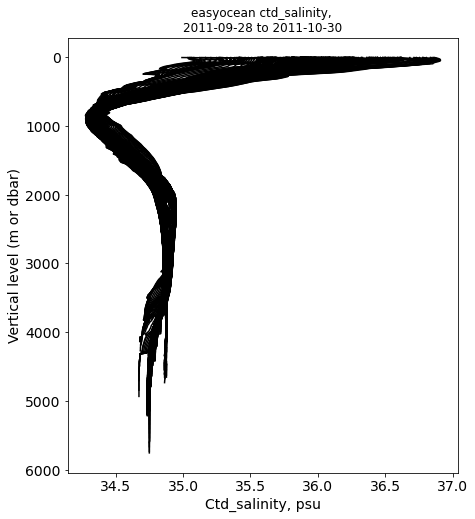

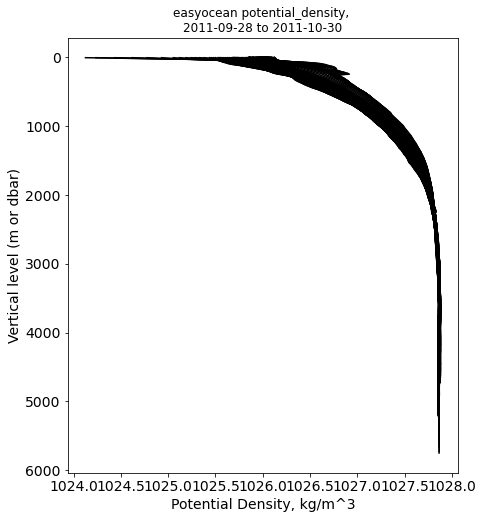

In [24]:
api_output_formatted_list_1var_plot_profiles(api_output_formatted_list)

In [ ]:
# line plots for all the points in the xar (using values and flatten?); draw the shape of interest in the maps showing profiles?

In [ ]:
inprogress

In [ ]:
#https://sites.google.com/view/paztronomer/blog/basic/python-colors
month_groups_cols= ['dodgerblue', 'violet', 'orangered', 'gold']
month_groups     = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
month_groups_tags= ['DJF', 'MAM', 'JJA', 'SON']
profiles_in_regions_and_horiz_ave_plot1d_all_col_by_monthgroup(data_reg=data_reg,month_groups=month_groups,month_groups_cols=month_groups_cols,month_groups_tags=month_groups_tags,xlabel_tag=vartitle)


In [ ]:
# bin in time? woceline with cchdo